# Exchange Rate Forcast Example

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

## Load Data and Data Exploration

In [2]:
data_file_name = "data/exchange_rates.csv"
dataset = pd.read_csv(data_file_name, parse_dates=['date'], index_col = 0, dayfirst=True)
dataset.head()

,Country/Currency,currency,value,date
0,Australia Dollar,AUD,1.581627,2021-12-17
1,Great Britain Pound,GBP,0.851619,2021-12-17
2,Euro,EUR,1.000000,2021-12-17
3,Japan Yen,JPY,128.301759,2021-12-17
4,Switzerland Franc,CHF,1.041015,2021-12-17


In [3]:
# some insight about whole dataset
dataset.describe()

,value,date
count,84134.000000,84134
mean,1628.216055,2022-09-22 01:28:21.029310464
min,0.130975,2021-12-17 00:00:00
25%,3.947605,2022-05-05 00:00:00
50%,33.889082,2022-09-22 00:00:00
75%,396.322227,2023-02-09 00:00:00
max,51690.453353,2023-06-29 00:00:00
std,5434.401055,NaN


Check if any null values present

In [4]:
dataset.isnull().sum()

Country/Currency    0
currency            0
value               0
date                0
dtype: int64

Types of Currency data present

In [5]:
dataset['currency'].unique()

array(['AUD', 'GBP', 'EUR', 'JPY', 'CHF', 'USD', 'AFN', 'ALL', 'DZD',
       'AOA', 'ARS', 'AMD', 'AWG', 'AZN', 'BSD', 'BHD', 'BDT', 'BBD',
       'BYR', 'BZD', 'BMD', 'BTN', 'BOB', 'BAM', 'BWP', 'BRL', 'BND',
       'BGN', 'BIF', 'XOF', 'XAF', 'XPF', 'KHR', 'CAD', 'CVE', 'KYD',
       'CLP', 'CNY', 'COP', 'KMF', 'CDF', 'CRC', 'HRK', 'CUC', 'CUP',
       'CZK', 'DKK', 'DJF', 'DOP', 'XCD', 'EGP', 'SVC', 'ETB', 'FKP',
       'FJD', 'GMD', 'GEL', 'GHS', 'GIP', 'GTQ', 'GNF', 'GYD', 'HTG',
       'HNL', 'HKD', 'HUF', 'ISK', 'INR', 'IDR', 'IRR', 'IQD', 'ILS',
       'JMD', 'JOD', 'KZT', 'KES', 'KWD', 'KGS', 'LAK', 'LBP', 'LSL',
       'LRD', 'LYD', 'MOP', 'MKD', 'MGA', 'MWK', 'MYR', 'MVR', 'MRO',
       'MUR', 'MXN', 'MDL', 'MNT', 'MAD', 'MZN', 'MMK', 'ANG', 'NAD',
       'NPR', 'NZD', 'NIO', 'NGN', 'KPW', 'NOK', 'OMR', 'PKR', 'PAB',
       'PGK', 'PYG', 'PEN', 'PHP', 'PLN', 'QAR', 'RON', 'RUB', 'RWF',
       'WST', 'STD', 'SAR', 'RSD', 'SCR', 'SLL', 'SGD', 'SBD', 'SOS',
       'ZAR', 'KRW',

In [6]:
# Print currency names
dataset['Country/Currency'].unique()

array(['Australia Dollar', 'Great Britain Pound', 'Euro', 'Japan Yen',
       'Switzerland Franc', 'USA Dollar', 'Afghanistan Afghani',
       'Albania Lek', 'Algeria Dinar', 'Angola Kwanza', 'Argentina Peso',
       'Armenia Dram', 'Aruba Florin', 'Azerbaijan New Manat',
       'Bahamas Dollar', 'Bahrain Dinar', 'Bangladesh Taka',
       'Barbados Dollar', 'Belarus Ruble', 'Belize Dollar',
       'Bermuda Dollar', 'Bhutan Ngultrum', 'Bolivia Boliviano',
       'Bosnia Mark', 'Botswana Pula', 'Brazil Real', 'Brunei Dollar',
       'Bulgaria Lev', 'Burundi Franc', 'CFA Franc BCEAO',
       'CFA Franc BEAC', 'CFP Franc', 'Cambodia Riel', 'Canada Dollar',
       'Cape Verde Escudo', 'Cayman Islands Dollar', 'Chili Peso',
       'China Yuan/Renminbi', 'Colombia Peso', 'Comoros Franc',
       'Congo Franc', 'Costa Rica Colon', 'Croatia Kuna',
       'Cuba Convertible Peso', 'Cuba Peso', 'Czech Koruna',
       'Denmark Krone', 'Djibouti Franc', 'Dominican Republich Peso',
       'East Caribb

In [7]:
unique_country = list(dataset['Country/Currency'].unique())
unique_currency = list(dataset['currency'].unique())
for x in range(len(unique_country)):
    print('Country name: {0} -> Currency: {1}'.format(unique_country[x], unique_currency[x]))

Country name: Australia Dollar -> Currency: AUD
Country name: Great Britain Pound -> Currency: GBP
Country name: Euro -> Currency: EUR
Country name: Japan Yen -> Currency: JPY
Country name: Switzerland Franc -> Currency: CHF
Country name: USA Dollar -> Currency: USD
Country name: Afghanistan Afghani -> Currency: AFN
Country name: Albania Lek -> Currency: ALL
Country name: Algeria Dinar -> Currency: DZD
Country name: Angola Kwanza -> Currency: AOA
Country name: Argentina Peso -> Currency: ARS
Country name: Armenia Dram -> Currency: AMD
Country name: Aruba Florin -> Currency: AWG
Country name: Azerbaijan New Manat -> Currency: AZN
Country name: Bahamas Dollar -> Currency: BSD
Country name: Bahrain Dinar -> Currency: BHD
Country name: Bangladesh Taka -> Currency: BDT
Country name: Barbados Dollar -> Currency: BBD
Country name: Belarus Ruble -> Currency: BYR
Country name: Belize Dollar -> Currency: BZD
Country name: Bermuda Dollar -> Currency: BMD
Country name: Bhutan Ngultrum -> Currency:

Pickup some country code for time series analysis

1. USA Dollar -> Currency: USD
2. China Yuan/Renminbi -> Currency: CNY

Extract appropriate data.

In [8]:
data_usd = dataset.loc[dataset.currency == 'USD']
data_usd.head()

,Country/Currency,currency,value,date
5,USA Dollar,USD,1.132548,2021-12-17
155,USA Dollar,USD,1.123810,2021-12-18
305,USA Dollar,USD,1.123810,2021-12-19
455,USA Dollar,USD,1.124405,2021-12-20
605,USA Dollar,USD,1.128382,2021-12-21


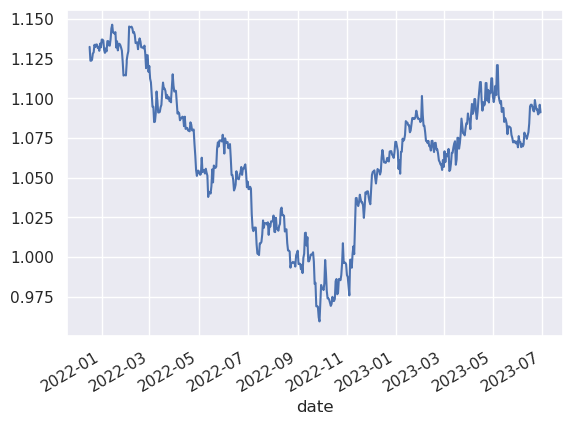

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

data_usd.set_index('date')['value'].plot()
plt.show()

In [10]:
data_cny = dataset.loc[dataset.currency == 'CNY']
data_cny.head()

,Country/Currency,currency,value,date
37,China Yuan/Renminbi,CNY,7.220899,2021-12-17
187,China Yuan/Renminbi,CNY,7.164741,2021-12-18
337,China Yuan/Renminbi,CNY,7.164741,2021-12-19
487,China Yuan/Renminbi,CNY,7.171681,2021-12-20
637,China Yuan/Renminbi,CNY,7.193097,2021-12-21


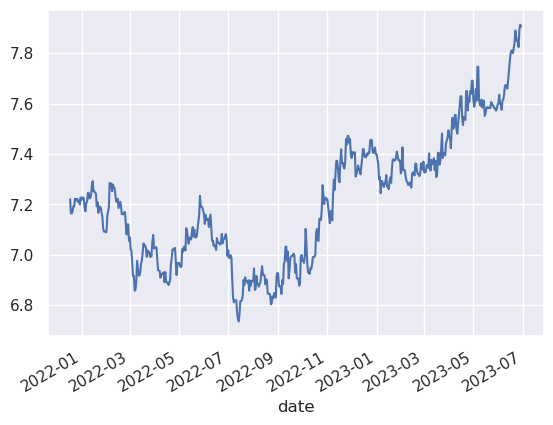

In [11]:
data_cny.set_index('date')['value'].plot()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

2023-06-29 21:59:10.484544: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 21:59:10.586349: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [ ]:
# Load the currency data into a DataFrame
df = pd.read_csv('currency_data.csv')

# Extract the target variable (e.g., closing prices) and features
target_variable = df['closing_price']
features = df.drop('closing_price', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_variable, test_size=0.2, random_state=42)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32)


In [ ]:
loss = model.evaluate(X_test_reshaped, y_test)
print("Loss: ", loss)


In [ ]:
loss = model.evaluate(X_test_reshaped, y_test)
print("Loss: ", loss)


In [ ]:
# Assuming you have new unseen data in a DataFrame called 'new_data'
new_data_scaled = scaler.transform(new_data)
new_data_reshaped = np.reshape(new_data_scaled, (new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))
predictions = model.predict(new_data_reshaped)
